In [1]:
pip install librosa pandas


In [2]:
!pip install lime shap scikit-learn pandas


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=818006f84db9bbdff2a0af68ea27877c2d6c75af6715d6e5c2286372f771e551
  Stored in directory: /root/.cache/pip/wheels/e7/5d/0e/4b4fff9a47468fed5633211fb3b76d1db43fe806a17fb7486a
Successfully built lime


In [3]:
!pip install python_speech_features

  Preparing metadata (setup.py) ... done
  Created wheel for python_speech_features: filename=python_speech_features-0.6-py3-none-any.whl size=5868 sha256=5f967ac25611f27a795d58b99df537be31150f6de3fa98c5c07eaa0dad072fe5
  Stored in directory: /root/.cache/pip/wheels/60/90/3c/4b5996a95d363fa14525597a19146a940bec467b44b2a14580
Successfully built python_speech_features


Imports

In [4]:
import numpy as np
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io.wavfile as wav
from python_speech_features import mfcc
import seaborn as sns
import librosa.display
import librosa
from tempfile import TemporaryFile
from sklearn.preprocessing import normalize

import os
import math
import pickle
import random
import operator


import math
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Additional libraries for data preprocessing and visualization
import cv2
from sklearn.model_selection import train_test_split

Loading the data

In [5]:
from google.colab import drive
drive.mount('/content/drive')
import os
Root = "/content/drive/MyDrive/Data"
os.chdir(Root)

Mounted at /content/drive


In [6]:
audio_data_path = "/content/drive/MyDrive/Data/genres_original"
music_data = pd.read_csv("/content/drive/MyDrive/Data/features_30_sec.csv")
music_data.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [7]:
music_data['label'].value_counts()

,count
label,
blues,100
classical,100
country,100
disco,100
hiphop,100
jazz,100
metal,100
pop,100
reggae,100


In [ ]:
#completed loading the dataset and analysing(we see a total of 10 labels with 100 data points from each , note that there is no class imbalance) , now we can begin with the EDA(exploratory data analysis)

In [8]:
import librosa.display
import librosa
from importlib import reload
plt=reload(plt)

**EDA**

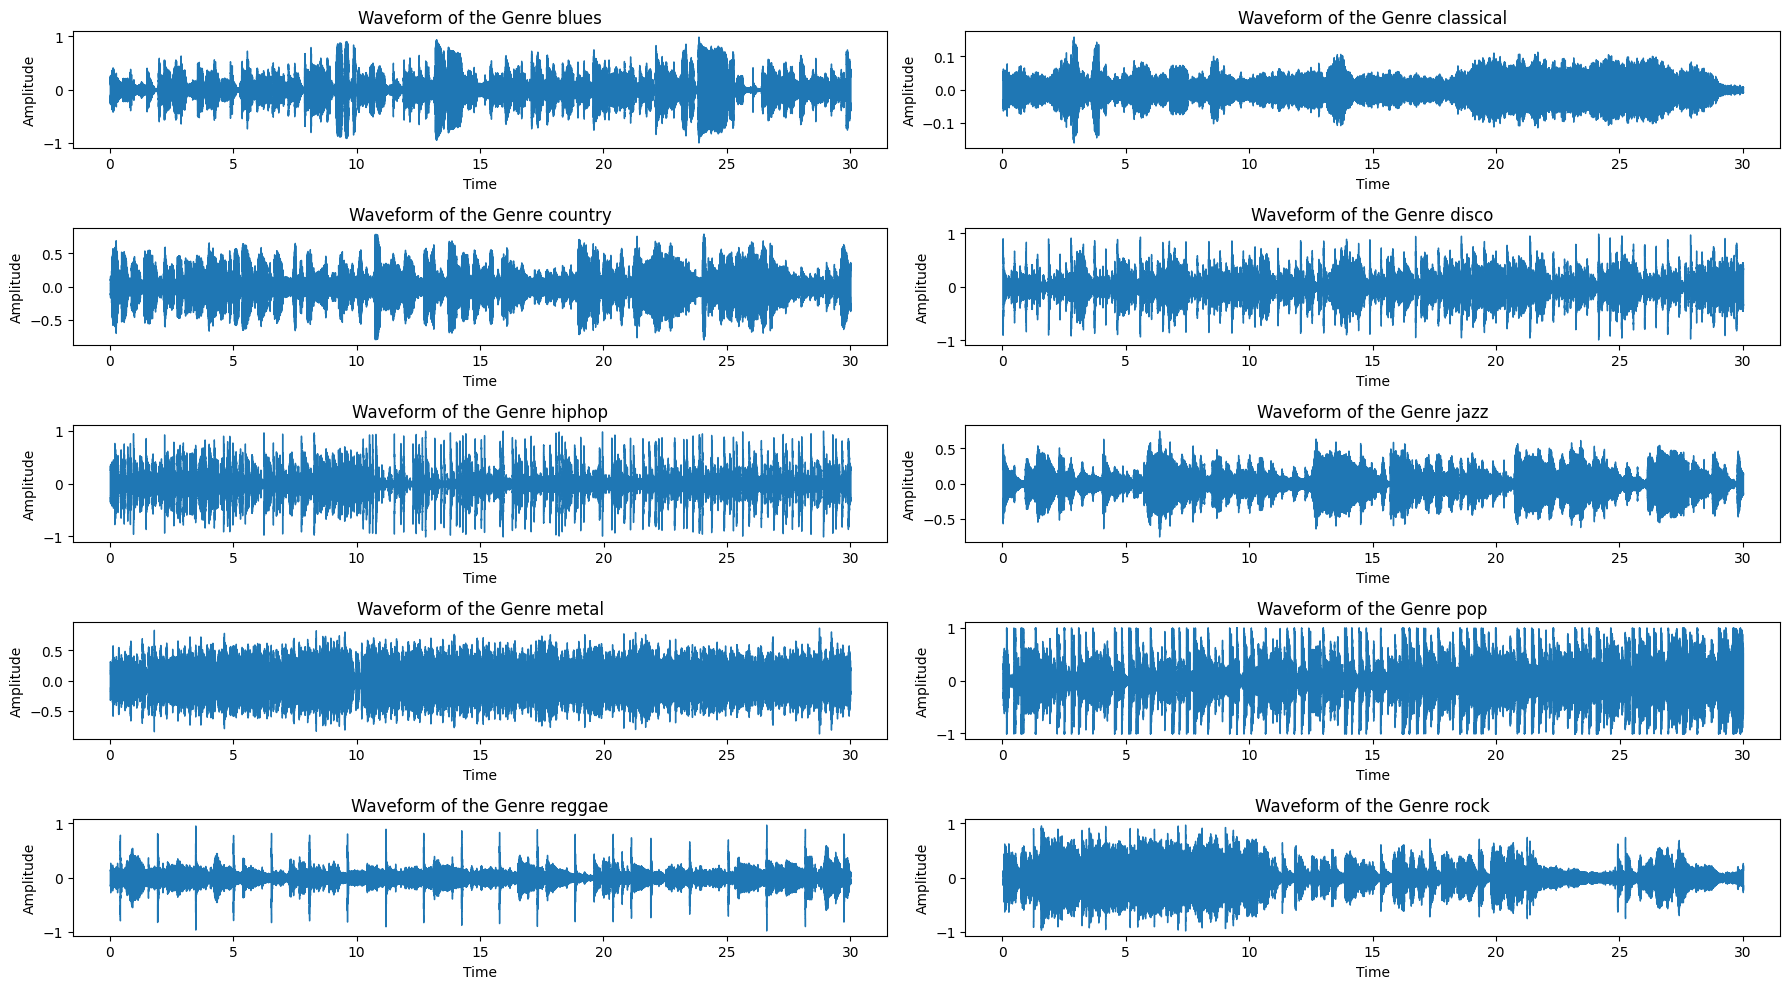

In [9]:
base_path = '/content/drive/MyDrive/Data/genres_original/'

# List of genre folders
genres = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']

# Create a figure for plotting the waveforms
plt.figure(figsize=(18, 10))

# Loop through each genre and plot the waveform
for i, genre in enumerate(genres):
    # Get the list of audio files in the genre folder
    genre_folder = os.path.join(base_path, genre)
    audio_files = os.listdir(genre_folder)

    #Note that we are plotting only the first audio file in each genre
    path = os.path.join(genre_folder, audio_files[0])

    plt.subplot(5, 2, i + 1)
    x, sr = librosa.load(path)
    librosa.display.waveshow(x, sr=sr)

    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.title(f'Waveform of the Genre {genre}')

# Adjust spacing between subplots
plt.tight_layout()

# Show the combined plot
plt.show()

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5]),
 [Text(0, 0.5, 'chroma_stft_mean'),
  Text(0, 1.5, 'rms_mean'),
  Text(0, 2.5, 'spectral_centroid_mean'),
  Text(0, 3.5, 'spectral_bandwidth_mean'),
  Text(0, 4.5, 'rolloff_mean'),
  Text(0, 5.5, 'zero_crossing_rate_mean'),
  Text(0, 6.5, 'harmony_mean'),
  Text(0, 7.5, 'perceptr_mean'),
  Text(0, 8.5, 'mfcc1_mean'),
  Text(0, 9.5, 'mfcc2_mean'),
  Text(0, 10.5, 'mfcc3_mean'),
  Text(0, 11.5, 'mfcc4_mean'),
  Text(0, 12.5, 'mfcc5_mean'),
  Text(0, 13.5, 'mfcc6_mean'),
  Text(0, 14.5, 'mfcc7_mean'),
  Text(0, 15.5, 'mfcc8_mean'),
  Text(0, 16.5, 'mfcc9_mean'),
  Text(0, 17.5, 'mfcc10_mean'),
  Text(0, 18.5, 'mfcc11_mean'),
  Text(0, 19.5, 'mfcc12_mean'),
  Text(0, 20.5, 'mfcc13_mean'),
  Text(0, 21.5, 'mfcc14_mean'),
  Text(0, 22.5, 'mfcc15_mean'),
  Text(0, 23.5, 'mfcc16_mean'),
  Text(0, 24.5, 

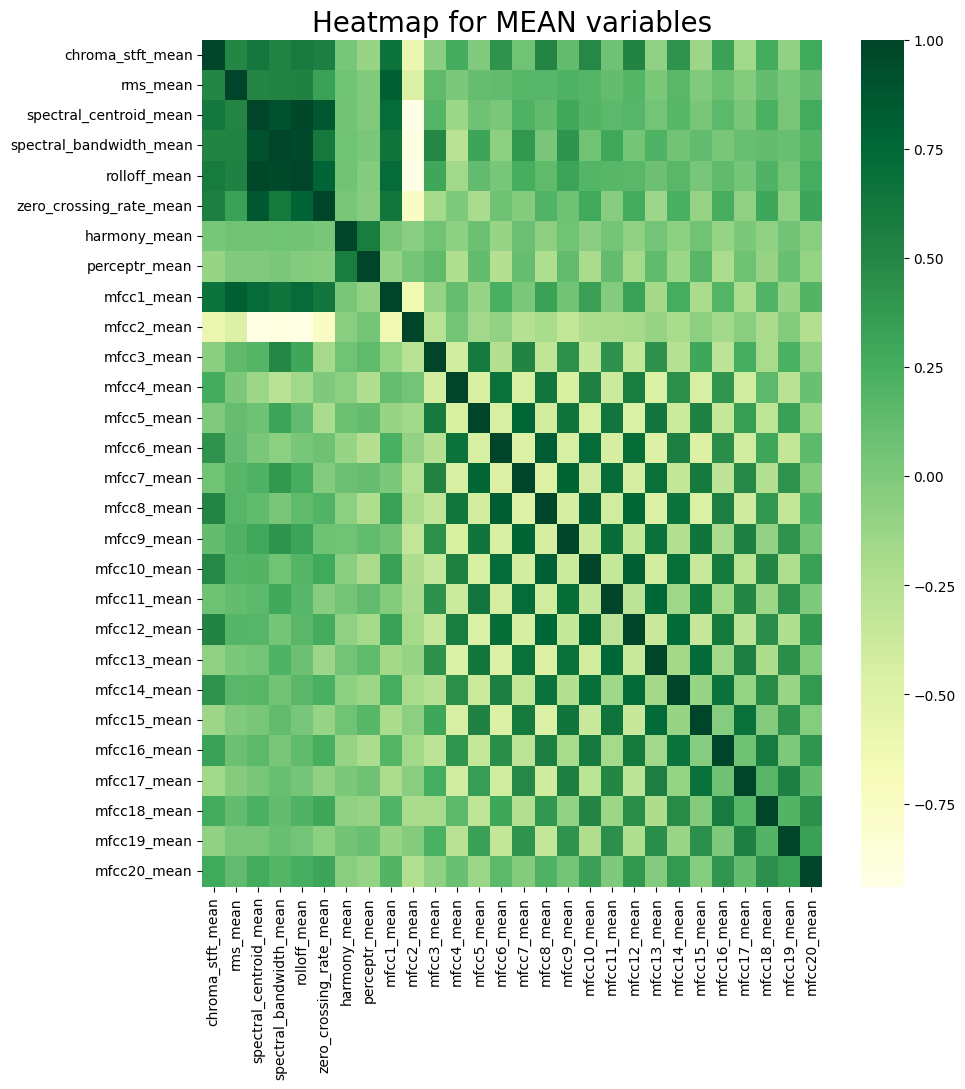

In [10]:
# Computing the Correlation Matrix
spike_cols = [col for col in music_data.columns if 'mean' in col]

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 11));

# Draw the heatmap , note that the function below internally centres the data , so no explicit requirement
sns.heatmap(music_data[spike_cols].corr(), cmap='YlGn')

plt.title('Heatmap for MEAN variables', fontsize = 20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

In [ ]:
#note that the below we have to plot various properties of particular point from a particular genre before beginning modelling to visualize the data , for example a spectrogram helps us see where energy is concentrated in frequency bands

/tmp/ipython-input-165450598.py:5: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  librosa.display.specshow(stft, sr=sr, x_axis = 'time', y_axis = 'hz')


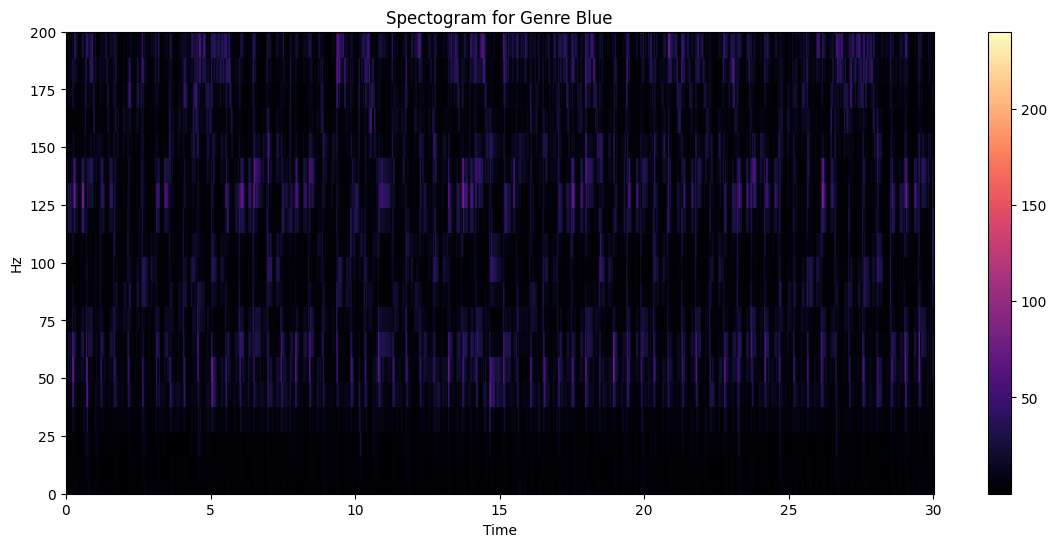

In [11]:
data, sr = librosa.load('/content/drive/MyDrive/Data/genres_original/blues/blues.00000.wav')
stft = librosa.stft(data)
stft_db = librosa.amplitude_to_db(abs(stft))
plt.figure(figsize =(14, 6))
librosa.display.specshow(stft, sr=sr, x_axis = 'time', y_axis = 'hz')
plt.ylim(0, 200)
plt.title('Spectogram for Genre Blue')
plt.colorbar()

/tmp/ipython-input-1885787257.py:5: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  librosa.display.specshow(stft, sr=sr, x_axis = 'time', y_axis = 'hz')


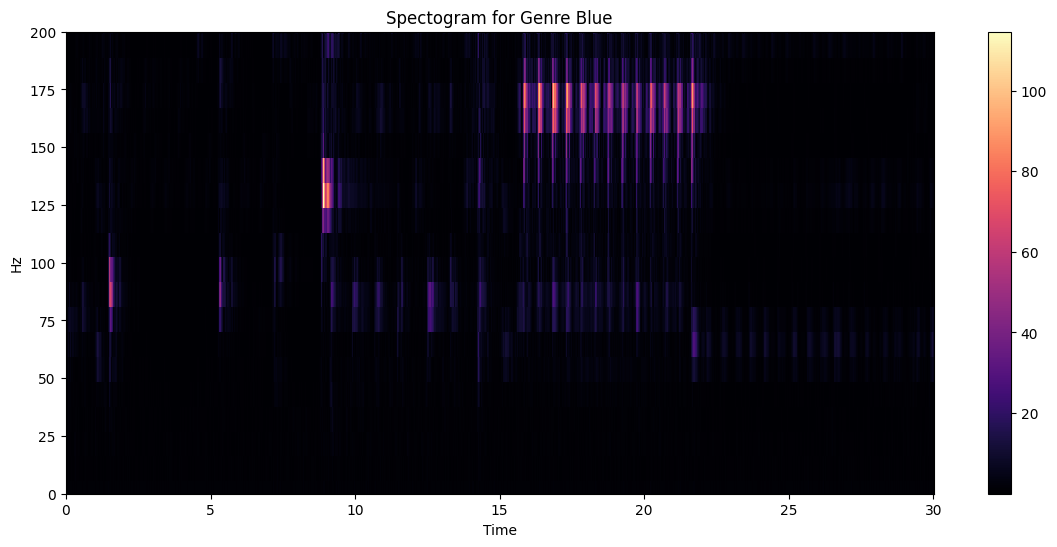

In [12]:
data2, sr2 = librosa.load('/content/drive/MyDrive/Data/genres_original/jazz/jazz.00000.wav')
stft = librosa.stft(data2)
stft_db = librosa.amplitude_to_db(abs(stft))
plt.figure(figsize =(14, 6))
librosa.display.specshow(stft, sr=sr, x_axis = 'time', y_axis = 'hz')
plt.ylim(0, 200)
plt.title('Spectogram for Genre Blue')
plt.colorbar() #note how the spectrogram of the 'blues' sample shows more pronounced low frequency components while that for 'jazz' shows some sort of harmonic structure

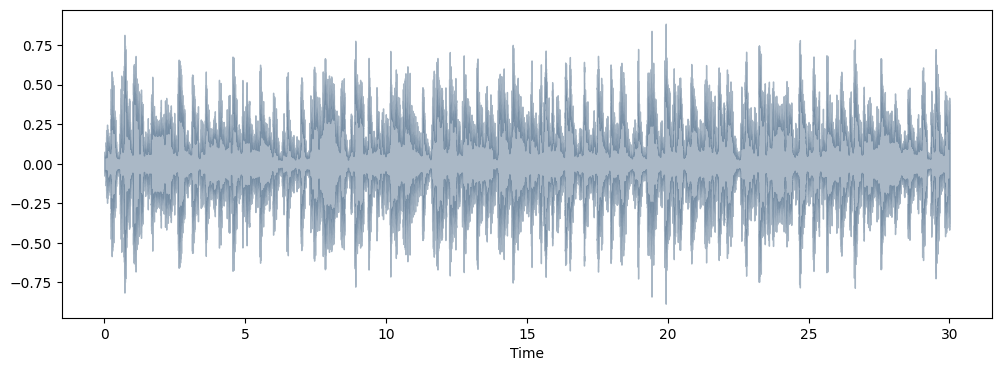

In [13]:
spectral_rolloff = librosa.feature.spectral_rolloff(y = data, sr=sr)[0]
plt.figure(figsize = (12, 4))
librosa.display.waveshow(data, sr=sr, alpha = 0.4, color = "#2B4F72")

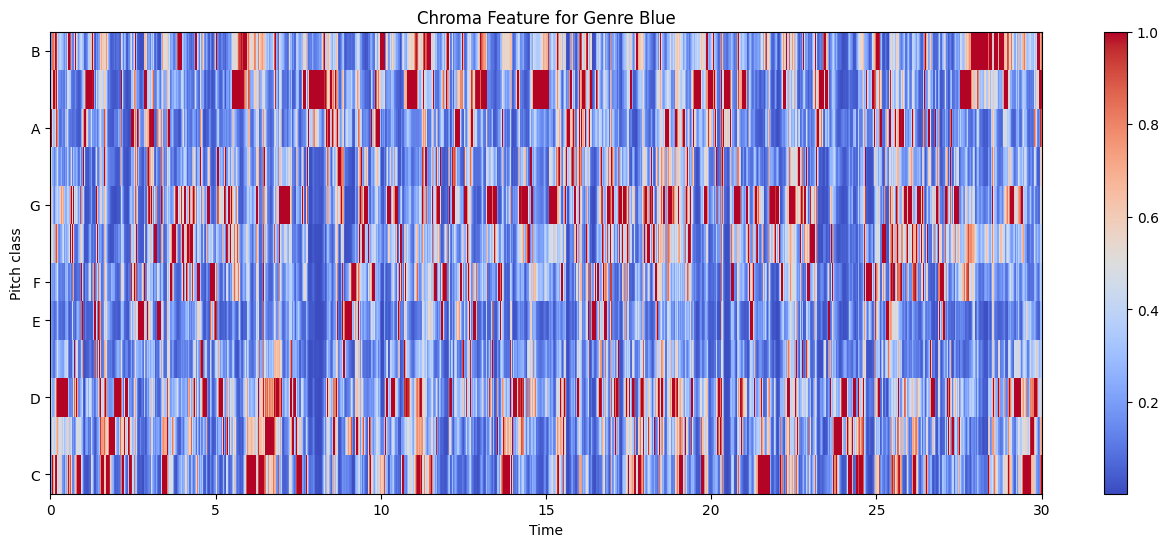

In [14]:
chroma = librosa.feature.chroma_stft(y = data, sr = sr)
plt.figure(figsize = (16,6))
librosa.display.specshow(chroma, sr = sr, x_axis='time', y_axis='chroma', cmap='coolwarm')
plt.colorbar()
plt.title('Chroma Feature for Genre Blue')
plt.show()

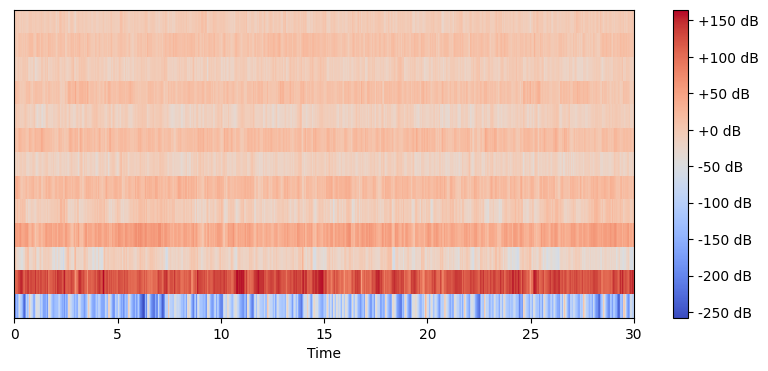

In [15]:
mfccs = librosa.feature.mfcc(y=data, sr=sr, n_mfcc=13)

# Display the MFCCs
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis='time', sr=sr)
plt.colorbar(format='%+2.0f dB')
plt.show() #note that we have done this only for the blues.00000.wav file

**Model implementation : Random Rorest**

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

data = pd.read_csv('/content/drive/MyDrive/Data/features_3_sec.csv')
data = data.iloc[0:, 1:]
y = data['label']
X = data.loc[:, data.columns != 'label']
cols = X.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)
scaled_df = pd.DataFrame(np_scaled, columns = cols)
scaled_df.head()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,0.0,0.355399,0.716757,0.293133,0.107955,0.262173,0.034784,0.459205,0.094130,0.346153,...,0.363613,0.056198,0.397172,0.066062,0.371828,0.055344,0.380831,0.026797,0.506746,0.047781
1,0.0,0.367322,0.670347,0.253040,0.044447,0.270969,0.018716,0.470831,0.052261,0.363722,...,0.468596,0.092912,0.351681,0.074001,0.362068,0.076365,0.418452,0.082414,0.593029,0.065548
2,0.0,0.373159,0.728067,0.296753,0.141663,0.265293,0.023073,0.494051,0.059922,0.378215,...,0.479681,0.096704,0.420979,0.050639,0.400536,0.067509,0.433742,0.043841,0.546264,0.036062
3,0.0,0.399349,0.677066,0.298024,0.075042,0.238427,0.023187,0.455246,0.066234,0.329587,...,0.386258,0.067995,0.387474,0.050617,0.380430,0.050030,0.405824,0.041898,0.562204,0.034873
4,0.0,0.355668,0.689113,0.322308,0.052149,0.233460,0.016451,0.451651,0.047830,0.318453,...,0.438567,0.042500,0.460314,0.083860,0.388590,0.076524,0.409019,0.020763,0.517913,0.031713


In [17]:
# Assuming X contains your features and y contains the corresponding labels
X_train, X_test, y_train, y_test = train_test_split(scaled_df, y, test_size=0.2, random_state=42)

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42) #note that initially the hyperparameters were set to some random values , we'd finetuning after this

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

       blues       0.87      0.87      0.87       208
   classical       0.94      0.98      0.96       203
     country       0.80      0.84      0.82       186
       disco       0.85      0.83      0.84       199
      hiphop       0.92      0.89      0.90       218
        jazz       0.86      0.93      0.89       192
       metal       0.87      0.95      0.91       204
         pop       0.92      0.95      0.93       180
      reggae       0.92      0.88      0.90       211
        rock       0.89      0.72      0.79       197

    accuracy                           0.88      1998
   macro avg       0.88      0.88      0.88      1998
weighted avg       0.88      0.88      0.88      1998



In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

data = pd.read_csv('/content/drive/MyDrive/Data/features_3_sec.csv')
data = data.iloc[0:, 1:]
y = data['label']
X = data.loc[:, data.columns != 'label']
cols = X.columns
std_scaler = preprocessing.StandardScaler() #note that we used min_max scaler instead of standard scaler because std_scaler may introduce negative values for certain features like frequency which makes no sense , though the tree structure will remain the same
np_scaled = std_scaler.fit_transform(X)
scaled_df = pd.DataFrame(np_scaled, columns = cols)
scaled_df.head()
# Assuming X contains your features and y contains the corresponding labels
X_train, X_test, y_train, y_test = train_test_split(scaled_df, y, test_size=0.2, random_state=42)

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42) #note that initially the hyperparameters were set to some random values , we'd finetuning after this

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

       blues       0.87      0.87      0.87       208
   classical       0.94      0.98      0.96       203
     country       0.80      0.84      0.82       186
       disco       0.85      0.83      0.84       199
      hiphop       0.92      0.89      0.90       218
        jazz       0.86      0.93      0.89       192
       metal       0.87      0.95      0.91       204
         pop       0.92      0.95      0.93       180
      reggae       0.92      0.88      0.90       211
        rock       0.89      0.72      0.79       197

    accuracy                           0.88      1998
   macro avg       0.88      0.88      0.88      1998
weighted avg       0.88      0.88      0.88      1998



In [19]:
# HYPERPARAMETER TUNING

from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
}

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(rf_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Train the model with the best parameters
best_rf_model = RandomForestClassifier(**best_params, random_state=42)
best_rf_model.fit(X_train, y_train)

# Print best model parameters
print("Best Random Forest Model Parameters:")
print(best_params)

# Print feature importances if available
if hasattr(best_rf_model, 'feature_importances_'):
    feature_importances = dict(zip(X_train.columns, best_rf_model.feature_importances_))
    print("\nFeature Importances:")
    print(pd.Series(feature_importances).sort_values(ascending=False))

# Print accuracy on the training set
train_predictions = best_rf_model.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)
print("\nTraining Accuracy:", train_accuracy)

# Print accuracy on the test set
test_predictions = best_rf_model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)
print("Test Accuracy:", test_accuracy)

Best Random Forest Model Parameters:
{'max_depth': None, 'n_estimators': 200}

Feature Importances:
perceptr_var               0.050081
rms_var                    0.036843
chroma_stft_mean           0.034956
rms_mean                   0.032349
mfcc4_mean                 0.031595
spectral_bandwidth_mean    0.031026
mfcc1_mean                 0.027247
rolloff_mean               0.027129
perceptr_mean              0.026890
harmony_var                0.025482
rolloff_var                0.025440
spectral_centroid_mean     0.023817
mfcc1_var                  0.023650
spectral_centroid_var      0.022027
mfcc9_mean                 0.021570
mfcc6_mean                 0.021350
harmony_mean               0.019842
zero_crossing_rate_mean    0.019588
mfcc3_mean                 0.019189
mfcc8_mean                 0.019032
chroma_stft_var            0.018318
mfcc5_var                  0.018219
mfcc7_mean                 0.017385
mfcc3_var                  0.017219
mfcc11_mean                0.016916


**Model Implementation : KNN**

In [17]:
def getNeighbors(trainingSet, instance, k):
    distances = []
    for x in range (len(trainingSet)):
        dist = distance(trainingSet[x], instance, k )+ distance(instance, trainingSet[x], k)
        distances.append((trainingSet[x][2], dist))
    distances.sort(key=operator.itemgetter(1))
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])
    return neighbors

In [18]:
def nearestClass(neighbors):
    classVote = {}

    for x in range(len(neighbors)):
        response = neighbors[x]
        if response in classVote:
            classVote[response]+=1
        else:
            classVote[response]=1

    sorter = sorted(classVote.items(), key = operator.itemgetter(1), reverse=True)
    return sorter[0][0]

In [19]:
def getAccuracy(testSet, predictions):
    correct = 0
    for x in range (len(testSet)):
        if testSet[x][-1]==predictions[x]:
            correct+=1
    return 1.0*correct/len(testSet)

In [20]:
"""
preprocessing using the wav files directly instead of using the precomputed features from the csv
files since they have features computed subject to certain constraints like time window, no. of MFCCs ,
the CSV averages features over the entire time window ,
in this case over 3 or 30 seconds, plus the CSV allows us only to store 1D columns for each data point , not 2D covariance matrices
 """

directory = audio_data_path
f = open("mydataset.dat", "wb")
i = 0
for folder in os.listdir(directory):
    #print(folder)
    i += 1
    if i == 11:
        break
    for file in os.listdir(directory+"/"+folder):
        #print(file)
        try:
            (rate, sig) = wav.read(directory+"/"+folder+"/"+file)
            mfcc_feat = mfcc(sig, rate, winlen = 0.020, appendEnergy=False) # each audiofile is broken down in 20ms frames and MFCCs are calculated for each frame
            covariance = np.cov(np.matrix.transpose(mfcc_feat)) #we caculate the MFCC covariance matrix for each frame for the entire length of each audiofile
            mean_matrix = mfcc_feat.mean(0) #we calculate the mean MFCC value for each coefficient for each audiofile across all the frames
            feature = (mean_matrix, covariance, i) # we store the mean MFCC values , the covariance matrix for all the frames , and the label for our model
            pickle.dump(feature, f) #used for serialising and deserialising , ie , it converts the data into storable binary format for the .dat file and when we need them back , we simply do pickle.load
        except Exception as e:
            print("Got an exception: ", e, 'in folder: ', folder, ' filename: ', file)
f.close()

Got an exception:  File format b'\xcb\x15\x1e\x16' not understood. Only 'RIFF', 'RIFX', and 'RF64' supported. in folder:  jazz  filename:  jazz.00054.wav


In [35]:
dataset = [] #splitting training and test data

def loadDataset( split, trset, teset):
    random.seed(42)
    with open('mydataset.dat','rb') as f:
        while True:
            try:
                dataset.append(pickle.load(f))
            except EOFError:
                f.close()
                break
    for x in range(len(dataset)):
        if random.random() < split:
            trset.append(dataset[x])
        else:
            teset.append(dataset[x])

trainingSet = []
testSet = []
loadDataset( 0.68, trainingSet, testSet) # ie I am saying that each datapoint has a 68% chance of entering the trainset and 32% chance of entering the testset , upon applying the law of large numbers the test data is roughly 32% of entire data , note that we have a total of 10000 files .

In [36]:
def distance(instance1, instance2, k):
    distance = 0
    mm1 = instance1[0]
    cm1 = instance1[1]
    mm2 = instance2[0]
    cm2 = instance2[1]
    distance = np.trace(np.dot(np.linalg.inv(cm2), cm1))
    distance += (np.dot(np.dot((mm2-mm1).transpose(), np.linalg.inv(cm2)), mm2-mm1))#note that we used mahalonobis distance or KL divergence instead of euclidean distance because euclidean distance treats all features as equally important and uncorrelated which can be misleading if the features have different scales

    distance += np.log(np.linalg.det(cm2)) - np.log(np.linalg.det(cm1))
    distance -= k
    return distance

In [38]:
%%time
# Make the prediction using KNN(K nearest Neighbors)
length = len(testSet)
predictions = []
for x in range(length):
    predictions.append(nearestClass(getNeighbors(trainingSet, testSet[x], 5))) #k=5
accuracy1 = getAccuracy(testSet, predictions)
print(accuracy1)

0.7186544342507645
CPU times: user 39.7 s, sys: 85.9 ms, total: 39.8 s
Wall time: 46.9 s


In [39]:
#test
%%time
from collections import defaultdict
results = defaultdict(int)

directory = audio_data_path
i = 1
for folder in os.listdir(directory):
    results[i] = folder
    i += 1


pred = nearestClass(getNeighbors(dataset, feature, 5)) #k=5
print(results[pred])

blues
CPU times: user 245 ms, sys: 1.14 ms, total: 246 ms
Wall time: 632 ms


Minimum class samples in train set: 598
Maximum k allowed to avoid NaNs: 30
Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best Parameters: {'n_neighbors': np.int64(1), 'p': 2, 'weights': 'uniform'}
Best Cross-Validation Accuracy: 0.8973962720742523

KNN Test Accuracy: 0.9041541541541541

KNN Classification Report:
               precision    recall  f1-score   support

       blues       0.94      0.93      0.93       400
   classical       0.92      0.94      0.93       399
     country       0.86      0.83      0.85       399
       disco       0.87      0.93      0.90       400
      hiphop       0.92      0.91      0.92       399
        jazz       0.89      0.88      0.88       400
       metal       0.96      0.96      0.96       400
         pop       0.93      0.89      0.91       400
      reggae       0.90      0.93      0.92       400
        rock       0.85      0.83      0.84       399

    accuracy                           0.90      3996
   macro avg     

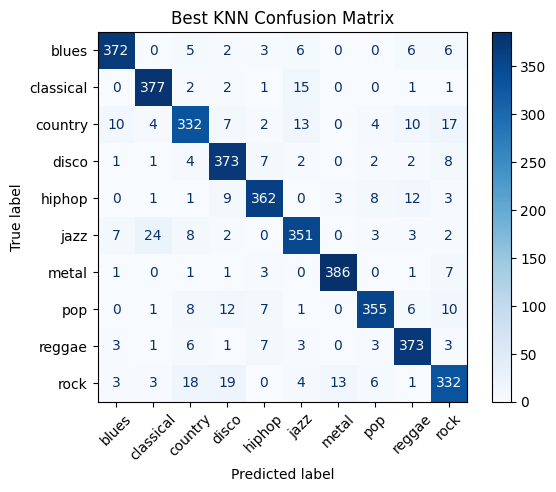

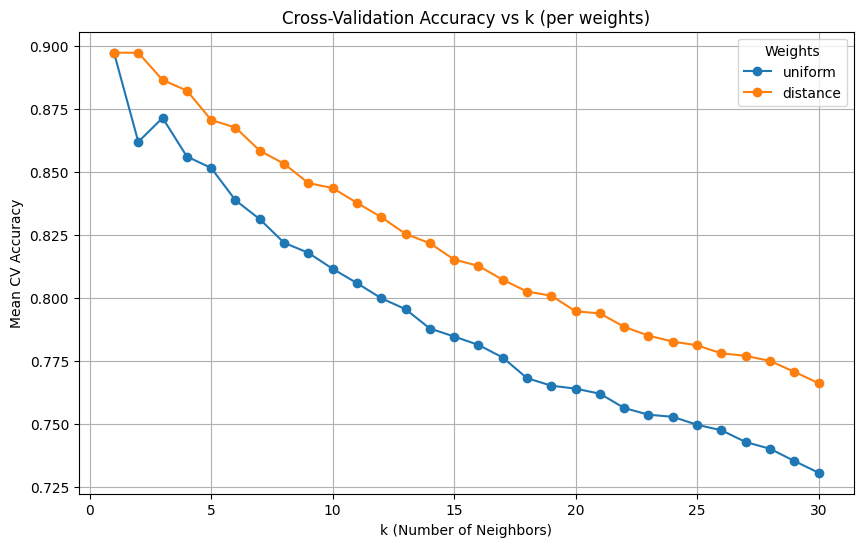


KNN Prediction for instance 0: blues


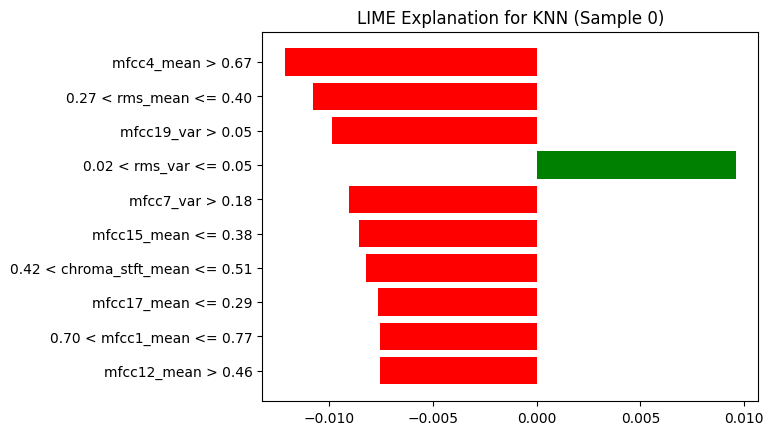


Random Forest Test Accuracy: 0.8450950950950951

Random Forest Classification Report:
               precision    recall  f1-score   support

       blues       0.83      0.84      0.84       400
   classical       0.89      0.95      0.92       399
     country       0.78      0.79      0.79       399
       disco       0.81      0.83      0.82       400
      hiphop       0.92      0.85      0.89       399
        jazz       0.84      0.85      0.85       400
       metal       0.84      0.93      0.88       400
         pop       0.90      0.84      0.87       400
      reggae       0.82      0.87      0.85       400
        rock       0.81      0.68      0.74       399

    accuracy                           0.85      3996
   macro avg       0.85      0.85      0.84      3996
weighted avg       0.85      0.85      0.84      3996


Random Forest Prediction for instance 0: blues


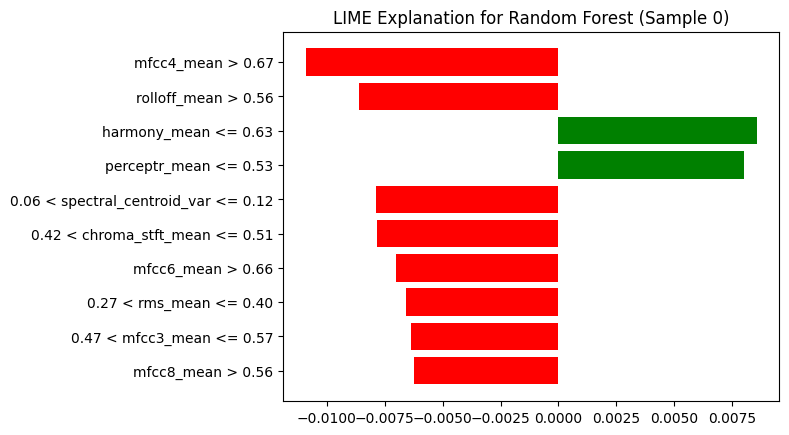

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from lime.lime_tabular import LimeTabularExplainer
import matplotlib.pyplot as plt
import shap
import numpy as np

# Load dataset
data = pd.read_csv('/content/drive/MyDrive/Data/features_3_sec.csv')
data = data.iloc[:, 1:]  # drop index column if exists

y = data['label']
X = data.drop(columns=['label'])

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42, stratify=y
)

# Scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Compute max K
min_class_samples = y_train.value_counts().min()
max_k = min(30, min_class_samples)
print(f"Minimum class samples in train set: {min_class_samples}")
print(f"Maximum k allowed to avoid NaNs: {max_k}")

# Grid Search for KNN
param_grid = {
    'n_neighbors': np.arange(1, max_k + 1),
    'weights': ['uniform', 'distance'],
    'p': [2]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

knn = KNeighborsClassifier()
grid_search = GridSearchCV(
    knn, param_grid, cv=cv, scoring='accuracy', n_jobs=-1, verbose=1
)

# Fit KNN
grid_search.fit(X_train_scaled, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Evaluate KNN on test set
best_knn = grid_search.best_estimator_
y_pred_knn = best_knn.predict(X_test_scaled)

print("\nKNN Test Accuracy:", accuracy_score(y_test, y_pred_knn))
print("\nKNN Classification Report:\n", classification_report(y_test, y_pred_knn))

# Confusion Matrix
disp = ConfusionMatrixDisplay.from_estimator(
    best_knn, X_test_scaled, y_test, cmap='Blues', xticks_rotation=45
)
plt.title("Best KNN Confusion Matrix")
plt.show()

# Accuracy vs k plot
results = pd.DataFrame(grid_search.cv_results_)
plt.figure(figsize=(10,6))

for w in ['uniform', 'distance']:
    subset = results[results['param_weights'] == w]
    plt.plot(subset['param_n_neighbors'], subset['mean_test_score'], marker='o', label=w)

plt.title("Cross-Validation Accuracy vs k (per weights)")
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Mean CV Accuracy")
plt.legend(title="Weights")
plt.grid(True)
plt.show()



""" Visualize LIME explanation (LIME stands for Local Interpretable Model-agnostic Explanations ,
it helps understand the input-output pairs and understand the prediction behind a particular instance through a black box model) """

# Initialize LIME for KNN
knn_explainer = LimeTabularExplainer(
    X_train_scaled,
    feature_names=X_train.columns,
    class_names=y.unique(),
    discretize_continuous=True
)

instance_idx = 0

# KNN prediction for selected instance
knn_pred_instance = best_knn.predict([X_test_scaled[instance_idx]])
print(f"\nKNN Prediction for instance {instance_idx}:", knn_pred_instance[0])

# LIME explanation for KNN
knn_exp = knn_explainer.explain_instance(
    X_test_scaled[instance_idx],
    best_knn.predict_proba,
    num_features=10
)

knn_exp.as_pyplot_figure()
plt.title(f"LIME Explanation for KNN (Sample {instance_idx})")
plt.show()

#  Random Forest

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Random Forest test accuracy
y_pred_rf = rf_model.predict(X_test_scaled)
print("\nRandom Forest Test Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nRandom Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

# Random Forest prediction for same instance
rf_pred_instance = rf_model.predict([X_test_scaled[instance_idx]])
print(f"\nRandom Forest Prediction for instance {instance_idx}:", rf_pred_instance[0])

# Initialize LIME for RF
rf_explainer = LimeTabularExplainer(
    X_train_scaled,
    feature_names=X_train.columns,
    class_names=y.unique(),
    discretize_continuous=True
)

# LIME explanation for RF
rf_exp = rf_explainer.explain_instance(
    X_test_scaled[instance_idx],
    rf_model.predict_proba,
    num_features=10
)

rf_exp.as_pyplot_figure()
plt.title(f"LIME Explanation for Random Forest (Sample {instance_idx})")
plt.show()


#SVM


Fitting 5 folds for each of 270 candidates, totalling 1350 fits

Best Parameters: {'svc__C': 10, 'svc__class_weight': 'balanced', 'svc__degree': 3, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}
Best Cross-Validation Score: 0.894

Test Set Accuracy: 0.903

Classification Report:
               precision    recall  f1-score   support

       blues       0.89      0.91      0.90       400
   classical       0.90      0.96      0.93       399
     country       0.86      0.86      0.86       399
       disco       0.87      0.91      0.89       400
      hiphop       0.93      0.91      0.92       399
        jazz       0.89      0.90      0.90       400
       metal       0.95      0.94      0.95       400
         pop       0.94      0.91      0.92       400
      reggae       0.92      0.89      0.90       400
        rock       0.90      0.84      0.87       399

    accuracy                           0.90      3996
   macro avg       0.90      0.90      0.90      3996
weighted avg     

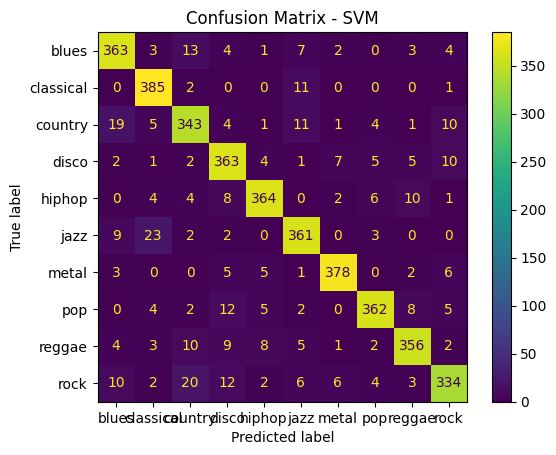


Cross-Validation Accuracy: 0.89 (+/- 0.01)

Random Forest Test Accuracy: 0.845

Random Forest Classification Report:
               precision    recall  f1-score   support

       blues       0.83      0.85      0.84       400
   classical       0.91      0.95      0.93       399
     country       0.79      0.80      0.79       399
       disco       0.79      0.84      0.82       400
      hiphop       0.89      0.83      0.86       399
        jazz       0.84      0.87      0.85       400
       metal       0.85      0.93      0.89       400
         pop       0.91      0.82      0.86       400
      reggae       0.80      0.85      0.82       400
        rock       0.85      0.70      0.77       399

    accuracy                           0.84      3996
   macro avg       0.85      0.84      0.84      3996
weighted avg       0.85      0.84      0.84      3996



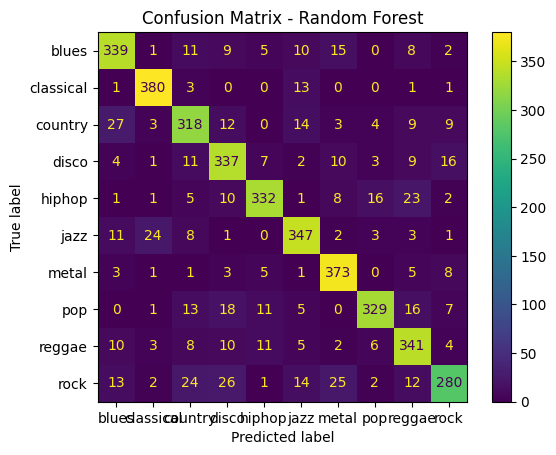

In [ ]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt


# 2. Combined Pipeline with StandardScaler and SVC
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC())
])

# 3. Hyperparameter Grid
param_grid = {
    'svc__C': [0.1, 1, 10],
    'svc__gamma': ['scale', 'auto', 0.1, 0.01, 0.001],
    'svc__kernel': ['rbf', 'poly','linear'],
    'svc__degree': [3, 4, 5],  # degree applies for poly kernel only
    'svc__class_weight': [None, 'balanced']
}

# 4. Grid Search with Cross-Validation
grid = GridSearchCV(pipeline, param_grid, verbose=2, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

print("\nBest Parameters:", grid.best_params_)
print("Best Cross-Validation Score: {:.3f}".format(grid.best_score_))

# 5. Evaluate the model
y_pred = grid.predict(X_test)
print("\nTest Set Accuracy: {:.3f}".format(grid.score(X_test, y_test)))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 6. Confusion Matrix Display
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title("Confusion Matrix - SVM")
plt.show()

# 7. Cross-validation score on the best estimator
scores = cross_val_score(grid.best_estimator_, X_train, y_train, cv=5)
print("\nCross-Validation Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

# 8. Compare with Random Forest
rf_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier())
])
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)

print("\nRandom Forest Test Accuracy: {:.3f}".format(rf_clf.score(X_test, y_test)))
print("\nRandom Forest Classification Report:\n", classification_report(y_test, rf_pred))
ConfusionMatrixDisplay.from_predictions(y_test, rf_pred)
plt.title("Confusion Matrix - Random Forest")
plt.show()


**Innovation Section**

We attempt to reduce the model inference time by reducing the dimensionality through PCA , so for every test sample that comes , we reduce its dimensions and then calculate the distances , which significantly reduces the no. of distance calculations and hence the model inference time.

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# 1. Load the features_30_sec.csv file
data_30_sec = pd.read_csv('/content/drive/MyDrive/Data/features_30_sec.csv')

# 2. Separate features (X) and labels (y)
X_30_sec = data_30_sec.drop(columns=['filename', 'label'])
y_30_sec = data_30_sec['label']

# 3. Split the X and y data into training and testing sets
X_train_30_sec, X_test_30_sec, y_train_30_sec, y_test_30_sec = train_test_split(
    X_30_sec, y_30_sec, test_size=0.2, random_state=42, stratify=y_30_sec
)

scaler_30_sec = MinMaxScaler()

X_train_scaled_30_sec = scaler_30_sec.fit_transform(X_train_30_sec)
X_test_scaled_30_sec = scaler_30_sec.transform(X_test_30_sec)

print("Data loaded, separated, split, and scaled successfully.")
print(f"X_train_scaled_30_sec shape: {X_train_scaled_30_sec.shape}")
print(f"X_test_scaled_30_sec shape: {X_test_scaled_30_sec.shape}")

Data loaded, separated, split, and scaled successfully.
X_train_scaled_30_sec shape: (800, 58)
X_test_scaled_30_sec shape: (200, 58)


In [30]:
from sklearn.decomposition import PCA

# 1. Initialize PCA to retain 95% of the variance
pca_30_sec = PCA(n_components=0.95, random_state=42)

# 2. Fit PCA on the scaled training data and transform it
X_train_pca_30_sec = pca_30_sec.fit_transform(X_train_scaled_30_sec)

# 3. Transform the scaled test data using the fitted PCA
X_test_pca_30_sec = pca_30_sec.transform(X_test_scaled_30_sec)

print(f"Original training features shape: {X_train_scaled_30_sec.shape}")
print(f"PCA-transformed training features shape: {X_train_pca_30_sec.shape}")
print(f"Original testing features shape: {X_test_scaled_30_sec.shape}")
print(f"PCA-transformed testing features shape: {X_test_pca_30_sec.shape}")
print(f"Number of components retained: {pca_30_sec.n_components_}")

Original training features shape: (800, 58)
PCA-transformed training features shape: (800, 30)
Original testing features shape: (200, 58)
PCA-transformed testing features shape: (200, 30)
Number of components retained: 30


In [33]:
%%time
#train
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# 1. Initialize KNN classifier with n_neighbors=5
kNN_classifier = KNeighborsClassifier(n_neighbors=5)

# 2. Train the KNN classifier on the PCA-transformed training data
kNN_classifier.fit(X_train_pca_30_sec, y_train_30_sec)



CPU times: user 3.15 ms, sys: 1.04 ms, total: 4.19 ms
Wall time: 4.32 ms


KNeighborsClassifier()

In [40]:
%%time
#test
# 3. Make predictions on the PCA-transformed test data
y_pred_knn_pca = kNN_classifier.predict(X_test_pca_30_sec)

# 4. Calculate and print the accuracy score
accuracy_knn_pca = accuracy_score(y_test_30_sec, y_pred_knn_pca)
print(f"Accuracy of KNN classifier on PCA-transformed data (n_neighbors=5): {accuracy_knn_pca:.4f}")

Accuracy of KNN classifier on PCA-transformed data (n_neighbors=5): 0.6950
CPU times: user 6.52 ms, sys: 0 ns, total: 6.52 ms
Wall time: 9.39 ms
